In [11]:
import sys
import graphviz
import numpy as np
import matplotlib.pyplot as plt

In [24]:

graph = graphviz.Digraph()
#vec = [int(_) for _ in sys.argv[2:]]
data = np.loadtxt("./data.txt")
vec = [int(x) for x in data]

N = (len(vec)-1)//2

def label(x):
    if x<N:
        return 'Unit %s'%(x)
    elif x==N:
        return 'Concentrate'
    else:
        return 'Tailings'

graph.attr(rankdir='LR')
graph.attr('node', shape='rectangle')

graph.edge('Feed', label(vec[0]), color='blue',
           headport='w', tailport='e',
           arrowhead='normal', arrowtail='normal')

for _ in range(N):
    graph.edge(label(_), label(vec[2*_+1]), color='blue',
               headport='w', tailport='n',
               arrowhead='normal')
    graph.edge(label(_), label(vec[2*_+2]), color='red',
               headport='w', tailport='s',
               arrowhead='normal')

with graph.subgraph() as s:
    s.attr(rank = 'source')
    for n in ('Feed',):
        s.node(n)

with graph.subgraph() as s:
    s.attr(rank = 'sink')
    for n in ('Tailings', 'Concentrate'):
        s.node(n)

graph.attr(label="vector: %s"%vec)
#graph.render(filename=sys.argv[1], cleanup=True)
graph.render('./graph/output', view=True)  

'./graph/output.pdf'

In [22]:
performance = np.loadtxt("./performance_list.txt")

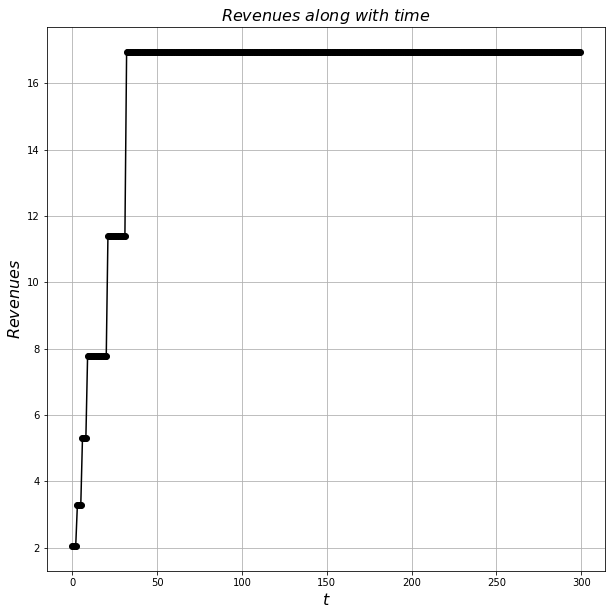

In [23]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)

ax1.plot(performance, 'ko-', label='peroformance')

ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$Revenues$', fontsize=16)
ax1.set_title('$Revenues$ $along$ $with$ $time$', fontsize=16)
ax1.grid()